In [40]:
import pandas as pd
import networkx as nx
import numpy as np
import random

In [41]:

df = pd.read_csv('PROPERTY_PROPOSAL.csv')

# Create an adjacency list

In [62]:
# Creat a graph
graph = nx.Graph()
for name, group in df.groupby(['thread_subject', 'page_name']):
    users = group['username'].unique()
    # Add an edge when two users are in same thread_subject and page_name
    for i in range(len(users)):
        for j in range(i + 1, len(users)):
            graph.add_edge(users[i], users[j], thread_subject=name[0], page_name=name[1])

adj_list = {node: list(neighbors) for node, neighbors in graph.adjacency()}

# Convert EdgeDataView generated by graph.edges to list in order to check the nodes, edges and attributes on each edge.
for (user1, user2, thread_and_page) in list(graph.edges(data=True))[:5]:
    print(f"Edge between {user1} and {user2} has attributes {thread_and_page}")
    
for node, neighbors in list(adj_list.items())[:5]:
    print(f"Node: {node}, Neighbors: {neighbors}")

Edge between Alexander Doria and WDGraham has attributes {'thread_subject': '\n{{Property proposal\n|status                 = not done\n|description            = indicates the current location of an ancient geographical feature\n|infobox parameter      = \n|datatype               = item\n|domain                 = place\n|allowed values         = \n|suggested values       = \n|source                 = \n|example                = numerous ancient athenian demes. For instance {{Q|12872216}} ', 'page_name': 'WikidataPropertyproposalArchive14.json'}
Edge between Alexander Doria and Secretlondon has attributes {'thread_subject': '\n{{Property proposal\n|status                 = not done\n|description            = indicates the current location of an ancient geographical feature\n|infobox parameter      = \n|datatype               = item\n|domain                 = place\n|allowed values         = \n|suggested values       = \n|source                 = \n|example                = numerous anci

In [60]:
df['username'].unique

<bound method Series.unique of 0        ديفيد عادل وهبة خليل 2
1                       Pintoch
2                  Сидик из ПТУ
3        ديفيد عادل وهبة خليل 2
4                       Gabbg82
                  ...          
52155                      MSGJ
52156                 Mario1257
52157              ArthurPSmith
52158                 Nepalicoi
52159                   Pamputt
Name: username, Length: 52160, dtype: object>

In [43]:
# Print the statistics of the graph
def print_graph_statistics(graph):

    print("Number of nodes: {}\nNumber of edges: {}".format(
        graph.number_of_nodes(), graph.number_of_edges()
    ))
    print("Number of connected components: {}".format(
        nx.number_connected_components(graph),
    ))
    print("Average degree: {}\nClustering coefficient: {}".format(
        np.mean([deg for _, deg in graph.degree]),
        nx.average_clustering(graph)
    ))

    try:  # attempt to compute the diameter of the graph
        diam = nx.diameter(graph)
        print("Graph diameter: {}".format(diam))
    except:  # an error has occurred
        print("\nERROR: Could not compute the diameter of the graph.")
        
print_graph_statistics(graph)


Number of nodes: 3051
Number of edges: 46154
Number of connected components: 1
Average degree: 30.254998361193053
Clustering coefficient: 0.8162450191460988
Graph diameter: 5


In [64]:
print(graph.number_of_edges())

46154


In [10]:
for i, conn_component in enumerate(
    nx.connected_components(graph)):
    print(f"[Graph component {i}]")
    sub_graph = graph.subgraph(conn_component)  
    print_graph_statistics(sub_graph)
    print("-"*50 + "\n")

[Graph component 0]
Number of nodes: 3051
Number of edges: 46154
Number of connected components: 1
Average degree: 30.254998361193053
Clustering coefficient: 0.8162450191460988
Graph diameter: 5
--------------------------------------------------


# Method
An adjacency list data structure was chosen to construct the network, storing information beyond the nodes—specifically, the topics and pages where two users interact—on the edges connecting the users.

# Complexity
The complexity of this network is that, for the groupby process in building the network, assuming there are G groups, a double nested for loop iterates over pairs of users. In the worst-case scenario (i.e., each group contains U users), the time complexity of the inner double loop is O(U^2). Assuming the grouping operation is O(N) and the processing of each group is O(U^2), the overall time complexity is roughly O(N + G*U^2), where G is the number of groups and U is the average number of users per group.

If the data is concentrated (i.e., G is small and U is large), the U^2 term has greater impact on the overall time complexity. Conversely, if the data is more dispersed (i.e., G is large and U is small), then N has a greater effect on the time complexity.

# Visualise the network

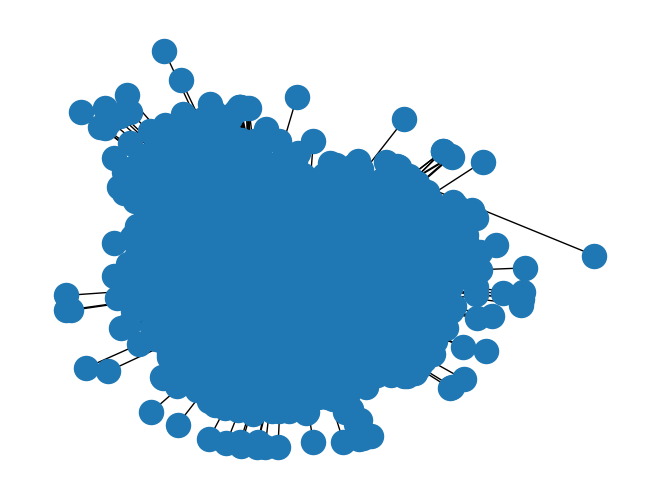

In [29]:
nx.draw(graph)

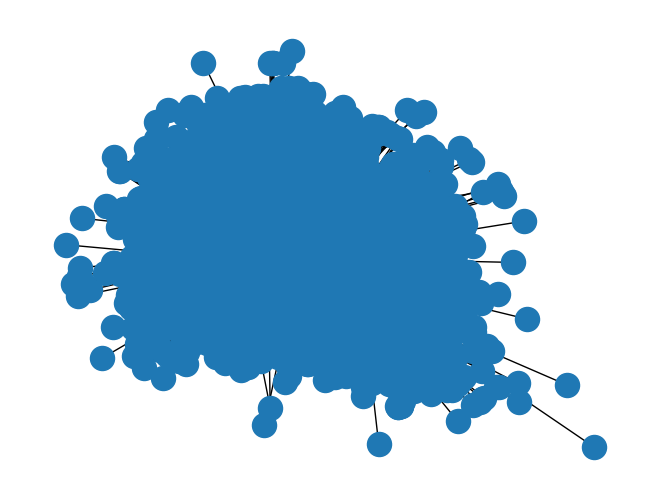

In [7]:
nx.draw(graph, pos=nx.spring_layout(graph))  # use spring layout

In [31]:
# Visualise the network with Bokeh
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure, from_networkx

output_notebook()

Loading BokehJS ...

In [32]:
# bokeh plot may fail on string node labels
int_node_labels = dict((n, i) for i, n in enumerate(graph.nodes))
graph_relabeled = nx.relabel_nodes(graph, int_node_labels)

In [39]:
crop_factors = dict(x_range=(-1.6,1.6), y_range=(-1.6,1.6))

plot = figure(
    title="Visualise the network with Bokeh",
    tools="", toolbar_location=None, **crop_factors
)

graph_plot = from_networkx(graph_relabeled, nx.spring_layout, scale=2, center=(0,0))

plot.renderers.append(graph_plot)

# output_file("networkx_graph.html")
show(plot)

Bokeh：
Based on the Bokeh network, we can observe: 1. Dense distribution, indicating tight connections between nodes, meaning there are many associations among users. 2. Nodes and edges are concentrated in the center, suggesting the possible existence of one or more highly connected central nodes. 3. No apparent subgroups, which may indicate a high degree of interconnectedness within the network. 4. Radiation from the center outward, potentially indicating the presence of one or more central nodes.




In [13]:
from bokeh.palettes import Spectral4
from bokeh.models import (Plot, Range1d, Circle, EdgesAndLinkedNodes, MultiLine,
                          NodesAndLinkedEdges, HoverTool, BoxZoomTool, TapTool,
                          WheelZoomTool, PanTool, ResetTool)

plot = Plot(width=800, height=400,
            x_range=Range1d(-1.6,1.6), y_range=Range1d(-1.6,1.6))
plot.title.text = "Interactive plot of the network"

plot.add_tools(
    HoverTool(tooltips=None),
    TapTool(), BoxZoomTool(), WheelZoomTool(), PanTool(), ResetTool())
graph_renderer = from_networkx(
    graph_relabeled, nx.spring_layout, scale=2, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=2, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=3, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=2, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#86b7ba", line_alpha=0.8, line_width=1)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=1)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=1)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

# output_file("interactive_graphs.html")
show(plot)

# Shortest-path algorithms comparison

In [20]:
# Breadth-first search
bfs_tree = nx.bfs_tree(graph, 'Circeus')
nx.shortest_path(bfs_tree, 'Circeus', 'Multichill')

['Circeus', 'ArthurPSmith', 'Multichill']

In [18]:
# A* search
def heuristic(a, b):
    return 0

nx.astar_path(graph, 'Circeus', 'Multichill', heuristic=heuristic)

['Circeus', 'ArthurPSmith', 'Multichill']

In [16]:
# Dijkstra
nx.shortest_path(graph, 'Circeus', 'Multichill', method='dijkstra')

['Circeus', 'Jane023', 'Multichill']

In [17]:
# Bellman-ford
nx.shortest_path(graph, 'Circeus', 'Multichill', method='bellman-ford')

['Circeus', 'Jane023', 'Multichill']

# Comparison with random graph
## -- Erdos-Renyi graph

In [44]:
# Erdos-Renyi graph for which n and p match the number of nodes and frequency of edge occurrence in the real network. The potential number of edges is n(n-1)/2, and so the frequency by which edges occur
p = 46154 / (3051*3050/2)
print(f"p = {p}")

p = 0.009919671593833787


In the comparison with random networks, the frequency by which edges occur in the Erdos-Renyi graph-constructed random network is 0.00992. This indicates that the probability of an edge existing between any two nodes in this Erdos-Renyi random graph model is approximately 0.99\%, reflecting the sparsity of connections in the graph, where most pairs of nodes are not directly connected by an edge. With less than 1\% of node pairs having an edge between them, the network's connections are relatively few.


In [45]:
# Create the Erdos-Renyi graph 
random_graph = nx.erdos_renyi_graph(n=3051, p=p)
nx.number_of_edges(random_graph)

45928

### Connected components

In [28]:
nx.number_connected_components(random_graph)

1

In [54]:
nx.number_connected_components(graph)

1

Both the random and real graphs exhibit only 1 connected component, indicating that whether it's a random network or a real network, the entire graph is connected with only a single connected component. This is in line with the theoretical prediction that the graph is expected to be connected when P > ln(n)/n, suggesting the graph does not contain any isolated nodes.

### Diameters

In [30]:
nx.diameter(random_graph)

4

Real world：5 diameters. 4<5, so the random network is less divided into distant subgroups but instead there is some short path between any two nodes.

### Average degree

In [31]:
degree_sequence = [d for n, d in random_graph.degree()]
sum(degree_sequence)/len(degree_sequence)

30.123893805309734

Real world: average degree: 30.254998361193053
Next criteria: degree distribution

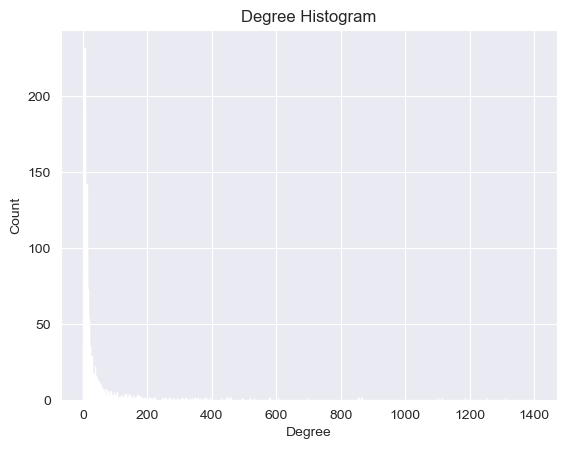

Average Clustering Coefficient: 0.8162450191460988
Average Shortest Path Length: 2.3841952383255154
Diameter: 5


In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate and display degree distribution
degrees = [graph.degree(n) for n in graph.nodes()]
plt.figure()
plt.hist(degrees, bins=np.arange(min(degrees), max(degrees) + 1, 1))
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# Calculate average clustering coefficient
avg_clustering = nx.average_clustering(graph)
print(f"Average Clustering Coefficient: {avg_clustering}")

# Calculate average shortest path length if the graph is connected
if nx.is_connected(graph):
    avg_path_len = nx.average_shortest_path_length(graph)
    print(f"Average Shortest Path Length: {avg_path_len}")
else:
    largest_cc = max(nx.connected_components(graph), key=len)
    subgraph = graph.subgraph(largest_cc)
    avg_path_len = nx.average_shortest_path_length(subgraph)
    print(f"Average Shortest Path Length in the Largest Connected Component: {avg_path_len}")

# Calculate diameter
if nx.is_connected(graph):
    diameter = nx.diameter(graph)
    print("Diameter:", diameter)
else:
    diameter = nx.diameter(subgraph)  # subgraph defined as above
    print("Diameter of the Largest Connected Component:", diameter)


In [47]:
import random

# Convert nodes to a list and randomly select two nodes
nodes_list = list(graph.nodes())
random_nodes = random.sample(nodes_list, 2)
source_node = random_nodes[0]
target_node = random_nodes[1]

# Run Dijkstra's algorithm to find the shortest path between the two random nodes
try:
    dijkstra_path = nx.dijkstra_path(graph, source=source_node, target=target_node)
    dijkstra_path_length = nx.dijkstra_path_length(graph, source=source_node, target=target_node)
    print(f"The shortest path between {source_node} and {target_node} is {dijkstra_path} with a length of {dijkstra_path_length}.")
except nx.NetworkXNoPath:
    print(f"There is no path between {source_node} and {target_node}.")

def heuristic(u, v):
    return abs(graph.degree(u) - graph.degree(v))

# Run A* algorithm to find the shortest path between the two random nodes
try:
    a_star_path = nx.astar_path(graph, source=source_node, target=target_node, heuristic=heuristic)
    a_star_path_length = nx.astar_path_length(graph, source=source_node, target=target_node, heuristic=heuristic)
    print(f"The shortest path between {source_node} and {target_node} using A* is {a_star_path} with a length of {a_star_path_length}.")
except nx.NetworkXNoPath:
    print(f"There is no path between {source_node} and {target_node} using A*.")

The shortest path between Mandariine and Gabbe is ['Mandariine', 'Pigsonthewing', 'Gabbe'] with a length of 2.
The shortest path between Mandariine and Gabbe using A* is ['Mandariine', 'Eric-92', 'SPQRobin', 'Ypnypn', 'Gabbe'] with a length of 4.


Random Graph Shortest Path Length: 2.7232275362552456
Random Graph Average Clustering Coefficient: 0.009858479844624622


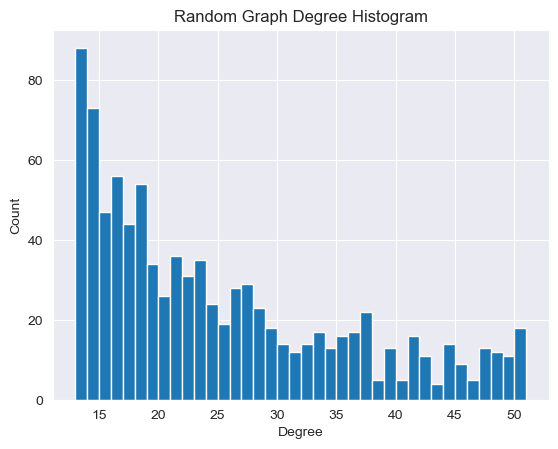

In [50]:
# Compare with a random graph
p = 46154 / (3051 * (3050 - 1) / 2)
random_graph = nx.erdos_renyi_graph(n=3051, p=p)
random_avg_clustering = nx.average_clustering(random_graph)
random_avg_path_len = nx.average_shortest_path_length(random_graph)
print(f"Random Graph Shortest Path Length: {random_avg_path_len}")
print(f"Random Graph Average Clustering Coefficient: {random_avg_clustering}")

random_degrees = [random_graph.degree(n) for n in random_graph.nodes()]
plt.figure()
plt.hist(degrees, bins=np.arange(min(random_degrees), max(random_degrees) + 1, 1))
plt.title("Random Graph Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()


# Task C

In [15]:

comment_counts = df.groupby(['username', 'page_name']).size().reset_index(name='comment_count')
average_comment_counts = comment_counts.groupby('page_name')['comment_count'].mean().reset_index(name='average_comment_count')
comment_counts = comment_counts.merge(average_comment_counts, on='page_name')

# Mark rows where the comment count exceeds the average
comment_counts['is_frequent'] = comment_counts['comment_count'] > 1 * comment_counts['average_comment_count']

# Randomly select two page_names and filter comments from these pages
selected_pages = random.sample(df['page_name'].unique().tolist(), 2)
selected_comments = comment_counts[comment_counts['page_name'].isin(selected_pages)]

# Find the unusual and active commenters identified on these two pages
frequent_commenters = selected_comments[selected_comments['is_frequent']]

print("Selected pages:", selected_pages)
print("Frequent commenters on selected pages:")
print(frequent_commenters[['username', 'page_name', 'comment_count', 'average_comment_count', 'is_frequent']])

Selected pages: ['WikidataPropertyproposalWashingtonRarePlantFieldGuide2021VersionID.json', 'WikidataPropertyproposalConstructionmethod.json']
Frequent commenters on selected pages:
Empty DataFrame
Columns: [username, page_name, comment_count, average_comment_count, is_frequent]
Index: []


In [16]:
filtered_usernames = df.loc[df['page_name'] == 'WikidataPropertyProposalKANTO.json', 'username']
print(filtered_usernames)


Series([], Name: username, dtype: object)


In [17]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

model = ep.ThresholdModel(graph)
# Extract usernames of active commenters
frequent_commenter_usernames = frequent_commenters['username'].unique()
config = mc.Configuration()
default_threshold = 0.1

# Set thresholds for nodes
for node in graph.nodes():
    config.add_node_configuration("threshold", node, default_threshold)
    
# Set initial states of nodes to 0, activate active users by setting state to 1 as initial infectors   
for node in graph.nodes():  
for node in graph.nodes():
    config.add_node_configuration("state", node, 0)

for username in frequent_commenter_usernames:
    if username in graph.nodes():  
        config.add_node_configuration("state", username, 1) 
    else:
        print(f"Node {username} not in graph")  
model.set_initial_status(config)

iterations = model.iteration_bunch(200)


/Users/liyuanyuanyuan/opt/anaconda3/lib/python3.9/site-packages/ndlib/models/DiffusionModel.py:120: UserWarning: Initial infection missing: a random sample of 5% of graph nodes will be set as infected
  warnings.warn('Initial infection missing: a random sample of 5% of graph nodes will be set as infected')


In [21]:
iterations[4]

{'iteration': 4,
 'status': {'87.54.11.4': 1,
  '90.63.14.233': 1,
  'Incola': 1,
  'Amphicoelias': 1,
  'Salixen': 1,
  '117.227.159.223': 1,
  'Liangent': 1,
  'Cirt': 1,
  'FA2010': 1,
  'PigeonIP': 1,
  'Interlaker': 1,
  'Rudolph Buch': 1,
  'Feuerst': 1,
  'Rsocol': 1,
  'Inkowik': 1,
  'Sixsi6ma': 1,
  'Bezik': 1,
  'Danneks': 1,
  'Eurodyne': 1,
  'Fryed-peach': 1,
  'Kolossos': 1,
  'Tyr': 1,
  'Jongleur1983': 1,
  'Genewiki123': 1,
  'Markus Krötzsch': 1,
  'Guillcote': 1,
  '83.240.94.18': 1,
  'Blackpen': 1,
  'Hosiryuhosi': 1,
  'Unbuttered Parsnip': 1,
  'Romero': 1,
  'Fomafix': 1,
  'MirchaelSchoenitzer': 1,
  '132.230.1.28': 1,
  'Gugganij': 1,
  'Marco Chemello (TOAS)': 1,
  'Ginkgobiloquad': 1,
  'Rodhullandemu': 1,
  'Silva Selva': 1,
  'TylerRogers': 1,
  '188.123.231.26': 1,
  'MRA': 1,
  'Daniele Pugliesi (WMIT)': 1,
  '-sasha-': 1,
  'Elena moz': 1,
  'Georgi Godev': 1,
  'Mariana.peteva.angelova': 1,
  'Dana Tomova': 1,
  'Elle.Kirilova': 1,
  '5.170.240.65': 1

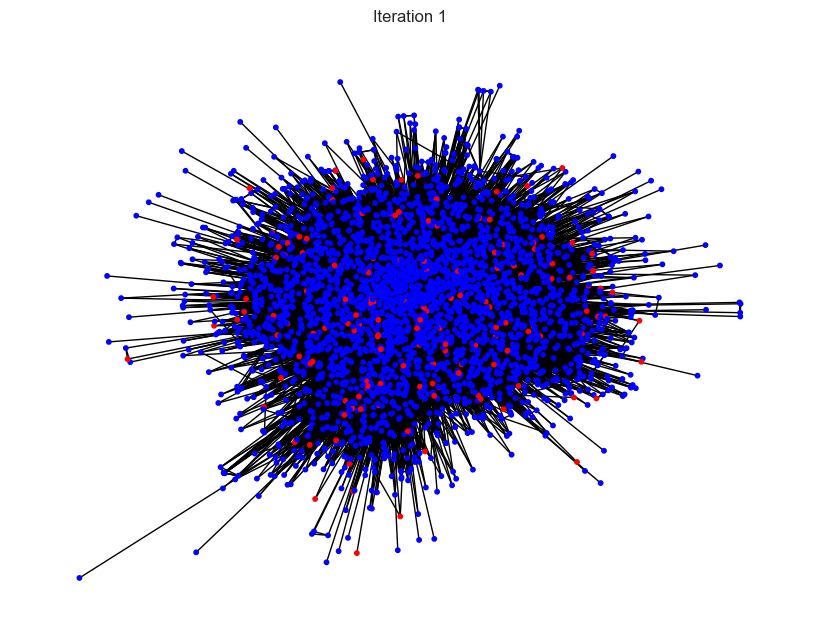

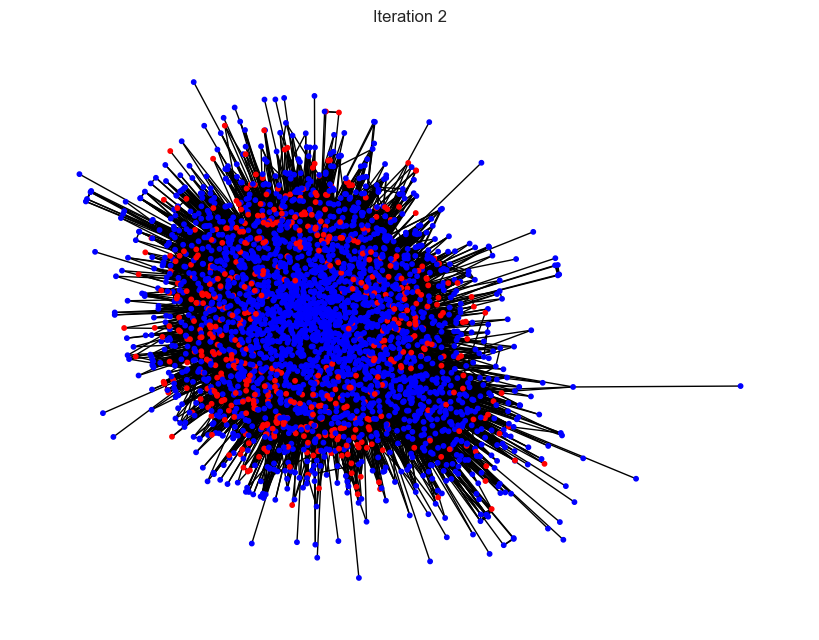

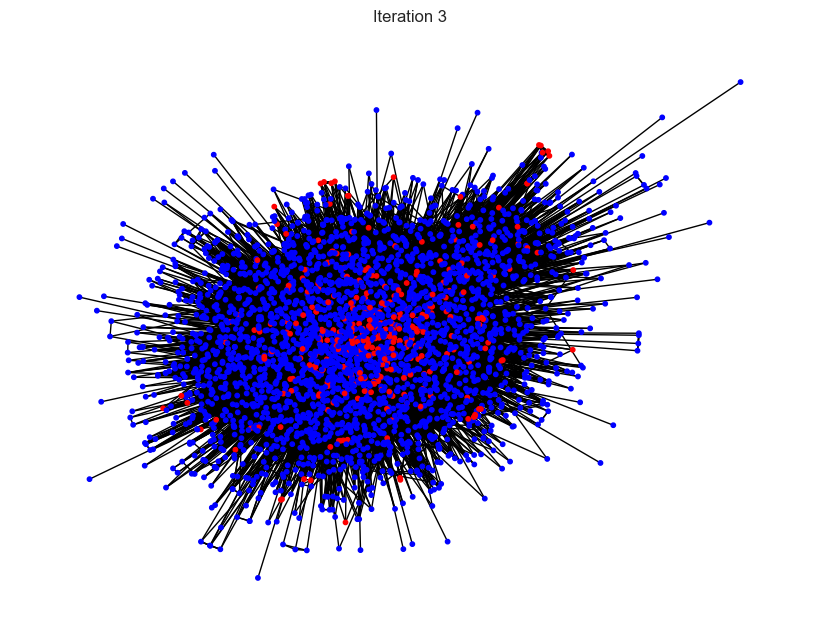

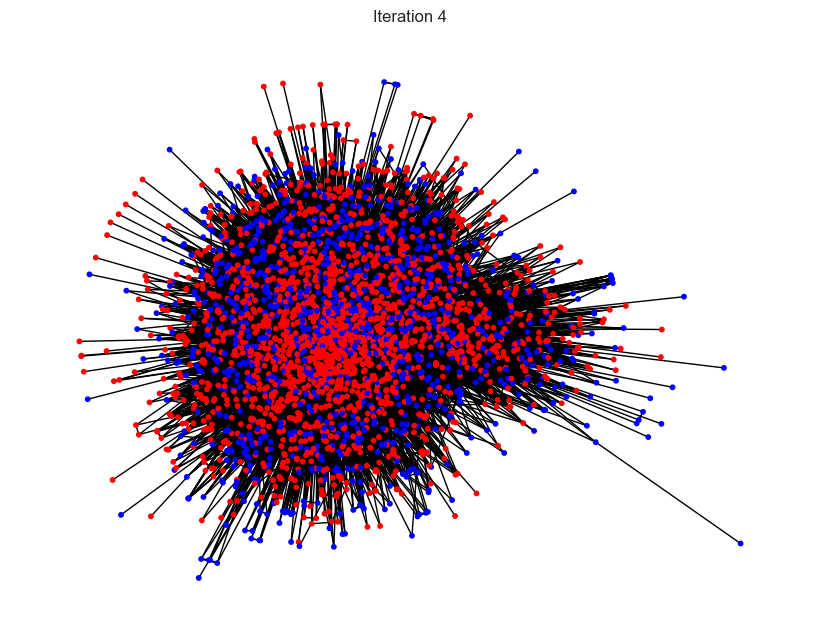

In [51]:
import matplotlib.pyplot as plt
import networkx as nx

# Use a dictionary to store the status of nodes for each iteration
nodes_status = {}

for i in range(4):
    iteration_data = iterations[i]['status']  
    nodes_status[i + 1] = iteration_data  

for iteration in range(1, 5):
    plt.figure(figsize=(8, 6))
    
    # Check if each node is in the status dictionary for the current iteration, defaulting to 0 or skipping if not found
    colors = []
    for node in graph.nodes():
        if node in nodes_status[iteration]:
            # Nodes in red indicate state 1, blue indicates state 0
            node_color = 'red' if nodes_status[iteration][node] == 1 else 'blue'
        else:
            node_color = 'blue'  
        colors.append(node_color)
    
    nx.draw(graph, with_labels=False, node_color=colors, node_size=10)  
    plt.title(f'Iteration {iteration}')
    plt.show()

Method in small-sized and medium-sized network:

In [55]:
def identify_infectious_nodes(df, threshold_factor=1):
    infectious_nodes = set()
    # Count comments per user per thread and page
    comment_counts = df.groupby(['thread_subject', 'page_name', 'username']).size().reset_index(name='counts')
    # Calculate average comments per thread and page
    avg_comments = comment_counts.groupby(['thread_subject', 'page_name'])['counts'].mean().reset_index(name='avg_comments')
    
    comment_counts = pd.merge(comment_counts, avg_comments, on=['thread_subject', 'page_name'], how='left')
    
    for index, row in comment_counts.iterrows():
        if row['counts'] > threshold_factor * row['avg_comments']:
            infectious_nodes.add(row['username'])
    
    return infectious_nodes

infectious_nodes = identify_infectious_nodes(df)
print(f"Infectious nodes identified: {len(infectious_nodes)}")

Infectious nodes identified: 0
